# **Topic: Exploring The Link Between Public Education Funding and School District Performance in Massachusetts**

Team: 8

Members: Aamir Azam, Pranav Bahadur, Vinaykrishnan Menon, Wajdan Mahbub, Yu Tsen Chen


**Project Scope**

We are investigating the relationship between public school funding and school district performance in the state of Massachusetts. In this analysis, we evaluated the performance of 256 school districts within the state, using publicly available data from 2009 to 2018. We evaluated the performance of school districts based on three measures, which were graduation rate, dropout rate, and SAT scores. We further analyzed these three criterias by student ethnicity and school district ethnicity to see whether minority students were benefiting from state funding of school districts.  


**Hypotheses**

We hypothesize that MA's high school graduation rate has changed very little over the past ten years, whereas public education spending has increased substantially. Therefore, the money being spent on public education is not being effectively utilized. The ineffective expenditure of funds is preventing the state high school graduation rate from crossing above 95%. 

**Data Source, Cleaning and Transformation**

Data for the 256 school districts was pulled from the Massachusetts Department of Education’s website. From the ‘School & District Profiles’ section of the website, we pulled district-level data on State Funding, 4-Year Graduation Rates, State Aid Per Pupil, SAT Performance, Class Size by Ethnicity, Class Size by Selected Populations, Teacher Salaries and Teacher Evaluation. 

Once the data was collected, we used Python and Colab to organize it into eight tables. Later, we cleaned and transformed the data before consolidating selected columns from each table into four master tables. 

Most of the data we collected was already cleaned and adequately formatted. However, some school districts had missing values in a few columns for a given year. To fix this problem, we used that school district’s average value to fill in the missing values. This approach prevented us from losing valuable data in other columns for the school district when we were consolidating data in Colab. 

An issue that we ran into was regarding SAT scores. Before 2015, the SAT consisted of three sections and was scored out of 2400. From 2015 onwards, the SAT was condensed into two sections and scored out of 1600. To account for the change in sections and scoring scale, we used a SAT score conversion table from College Board to convert scores before 2015 to the new scoring scale. This method allowed for an accurate comparison of scores for the ten years. School district data was narrowed down to exclude magnet schools as students are required to pass entrance exams, resulting in skewed data in terms of SAT scores, graduation, and dropout. 

Once the data inside all eight tables had been cleaned, we changed column names, added dummy variables to denote school ethnicity, and further consolidated the data into four master tables. The data in each master table only looked at public schools and charter schools inside Massachusetts.


**Master Tables**

The four master tables that were created are District Level Data, Graduation Rate by Ethnicity, Dropout Rate by Ethnicity and SAT Scores by Ethnicity:

1) District Level Data consists of 30 columns and 2,536 rows. This table houses all the important characteristics of each school district.

2) Graduation Rate by Ethnicity consists of 8 columns and 6,274 rows. This table houses the graduation rate for each school district by student ethnicity and school district ethnicity. 

3) Dropout Rate by Ethnicity consists of 8 columns and 8,997 rows. This table houses the dropout rate for each school district by student ethnicity and school district ethnicity. 

4) SAT Scores by Ethnicity consists of 7 columns and 5,129 rows. This table houses SAT scores for each school district by student ethnicity and school district ethnicity. 

You can download these tables using the code at the very bottom of this notebook.



**Data Consolidation & Exploration**

In [0]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Date Source Upload
df3= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Chapter 70 Foundation Budget and Net School Spending.xlsx')
df4= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/4 Year Graduation Rate.xlsx')
df5= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Per Pupil Expenditure.xlsx')
df6= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/SAT Performance.xlsx')
df7= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Class Size by Race Ethnicity Report.xlsx')

df8= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Selected Populations Report.xlsx')
df8= df8[ ['Year','District Name', 'District Code', 'Low Income #', 'Low Income %','Economically Disadvantaged #','Economically Disadvantaged %']]

df8['Low Income %'] = df8['Low Income %'].apply(pd.to_numeric, downcast='float', errors='coerce')
df8['Economically Disadvantaged %'] = df8['Economically Disadvantaged %'].apply(pd.to_numeric, downcast='float', errors='coerce')

df8= df8.fillna(0)
df8['Low_Income_%']= df8['Low Income %'] + df8['Economically Disadvantaged %']

df9= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Teacher Salaries Report.xlsx')

df9= df9.rename(columns={"Salary Totals": "Teacher_Salary_Exp", "Average Salary": "Teacher_Avg_Salary",'FTE Count': 'Total_Teachers'})

df10= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Educator Evaluation Data.xlsx')
df10['% Exemplary'] = df10['% Exemplary'].apply(pd.to_numeric, downcast='float', errors='coerce')
df10['% Proficient'] = df10['% Proficient'].apply(pd.to_numeric, downcast='float', errors='coerce')
df10['% Needs Improvement'] = df10['% Needs Improvement'].apply(pd.to_numeric, downcast='float', errors='coerce')
df10['% Unsatisfactory'] = df10['% Unsatisfactory'].apply(pd.to_numeric, downcast='float', errors='coerce')

df11=pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Dropout by Ethnicity.xlsx')

df12= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/Graduate by Ethnicity.xlsx')

df14= pd.read_excel('/content/drive/Shared drives/MOD 4 IS833 Team Folder/DOE MASS EDU Tables/SAT Scores by Ethnicity.xlsx')


In [0]:
# Creating Main table to consolidate data

main= pd.merge(left_on=['Year', 'District Code'], right_on=['Year', 'District Code'], how='inner',left=df3, right=df4 ).drop('District Name_y', axis=1).rename(columns={'District Name_x': 'District Name'})
main= main[(main['District Name'] != 'State Totals')]
main= pd.merge(left_on=['Year', 'District Code'], right_on=['Year', 'District Code'], how='inner',left=main, right=df5 ).drop('District Name_y', axis=1).rename(columns={'District Name_x': 'District Name'})
main= pd.merge(left_on=['Year', 'District Code'], right_on=['Year', 'District Code'], how='inner',left=main, right=df6 ).drop('District Name_y', axis=1).rename(columns={'District Name_x': 'District Name'})

main= main.drop(['Reading/Writing', 'Writing','Math','Reading/Writing Rounded', 'Math Rounded', 'Required NSS','Amount Over or Under Required', 'Actual NSS as % of Required',\
                 'Foundation Budget','Public Actual NSS as % of Foundation','Total Expenditures', 'Total Pupil FTEs','Total Expenditures per Pupil',
                 '% Still in School', '% Non-Grad Completers','% H.S. Equiv.','% Permanently Excluded','Tests Taken'], axis=1)
main= main.drop_duplicates().dropna()

main= main.rename(columns={"# in Cohort": "HS_Seniors", "In-District Expenditures per Pupil": "Total_Per_Pupil_Exp",'Total In-district FTEs':'Total_Students',
                           '% Graduated': 'Graduated_%', '% Dropped Out': 'Dropped_Out_%', 'Actual NSS': 'Total_State_Aid',
                           'New Writing Score':'New_Writing_Score', 'New Math Score': 'New_Math_Score', 'In-District Expenditures':'Total_Exp',
                           'District Name': 'District_Name', 'District Code': 'District_Code'} )

main['State_Aid_Per_Pupil']= (main['Total_State_Aid']/main['Total_Students']).round(2)

main= main[ ['Year', 'District_Name', 'District_Code', 'Total_State_Aid','State_Aid_Per_Pupil',
       'HS_Seniors', 'Graduated_%', 'Dropped_Out_%','Total_Students', 'New_Writing_Score','New_Math_Score']]

# Adding Extra Columns

main= pd.merge(left_on=['Year', 'District_Code'], right_on=['Year', 'District Code'], how='left',left=main, right=df7 ).drop(['District Name', 'District Code', 'Total # of Classes', 'Number of Students','Native American %', 'Native Hawaiian, Pacific Islander %','Multi-Race, Non-Hispanic %'], axis=1) #.rename(columns={'District Name_x': 'District Name'})

# Low Income Data
main= pd.merge(left_on=['Year', 'District_Code'], right_on=['Year', 'District Code'], how='inner',left=main, right=df8 ).drop(['District Name', 'District Code',  'Economically Disadvantaged #','Economically Disadvantaged %' , 'Low Income #', 'Low Income %'], axis=1) #.rename(columns={'District Name_x': 'District Name'})
main['White %'] = main['White %'].apply(pd.to_numeric, downcast='float', errors='coerce')

#Teacher Salary Info.
main= pd.merge(left_on=['Year', 'District_Code'], right_on=['Year', 'District Code'], how='inner',left=main, right=df9 ).drop(['District Name', 'District Code'] , axis=1) 

main['Average Class Size'].fillna((main['Average Class Size'].mean()), inplace=True)
main['African American %'].fillna((main['African American %'].mean()), inplace=True)
main['Asian %'].fillna((main['Asian %'].mean()), inplace=True)
main['Hispanic %'].fillna((main['Hispanic %'].mean()), inplace=True)
main['White %'].fillna((main['White %'].mean()), inplace=True)

main= main.rename(columns={"Average Class Size": "Average_Class_Size", "African American %": "African_American_%",'Asian %': 'Asian_%', 'Hispanic %': 'Hispanic_%', 'White %': 'White_%'})

student_body= main.groupby(['District_Name', 'District_Code']).aggregate({'African_American_%': 'mean', 'Asian_%': 'mean', 'Hispanic_%': 'mean', 'White_%': 'mean'})
student_body['Max']= student_body.max(axis=1)
student_body['Majority_Ethnicity']= np.nan

student_body.loc[student_body['Max'] == student_body['White_%'], 'Majority_Ethnicity'] = 'White'
student_body.loc[student_body['Max'] == student_body['Hispanic_%'], 'Majority_Ethnicity'] = 'Hispanic'
student_body.loc[student_body['Max'] == student_body['Asian_%'], 'Majority_Ethnicity'] = 'Asian'
student_body.loc[student_body['Max'] == student_body['African_American_%'], 'Majority_Ethnicity'] = 'African American'
student_body= student_body.reset_index(drop=False)
student_body= student_body[ ['District_Name', 'District_Code', 'Majority_Ethnicity'] ]

main= pd.merge(left_on=['District_Name','District_Code'], right_on=['District_Name','District_Code'], how='inner',left=main, right= student_body )

main= main[ ['Year', 'District_Name', 'District_Code', 'Total_State_Aid',
       'State_Aid_Per_Pupil', 'HS_Seniors', 'Graduated_%', 'Dropped_Out_%',
       'Total_Students', 'New_Writing_Score', 'New_Math_Score',
       'Average_Class_Size', 'African_American_%', 'Asian_%', 'Hispanic_%',
       'White_%', 'Majority_Ethnicity','Low_Income_%', 'Teacher_Salary_Exp', 'Teacher_Avg_Salary',
       'Total_Teachers'] ]
       
teacher= df10.groupby(['District Name', 'District Code']).aggregate(Teacher_Exemplary_ = ('% Exemplary', 'mean'), Teacher_Proficient_= ('% Proficient', 'mean'), Teacher_Needs_Improvement_ = ('% Needs Improvement' , 'mean'),  Teacher_Unsatisfactory_ = ('% Unsatisfactory', 'mean')).reset_index() 

main= pd.merge(left_on=['District_Name','District_Code'], right_on=['District Name','District Code'], how='left',left=main, right=teacher).drop(['District Name', 'District Code'], axis=1)

main= main.fillna(0)

# Adding dummy variable to denote school district's ethnicity
main= pd.get_dummies(data= main, columns= ['Majority_Ethnicity'])

# Converting columns to $1000s
main['State_Aid_Per_Pupil_(1000s)']= main['State_Aid_Per_Pupil']/1000
main['Teacher_Avg_Salary_(1000s)']= main['Teacher_Avg_Salary']/1000

# Adding back 'Majority Ethnicity' column
student_body= main.groupby(['District_Name', 'District_Code']).aggregate({'African_American_%': 'mean', 'Asian_%': 'mean', 'Hispanic_%': 'mean', 'White_%': 'mean'})
student_body['Max']= student_body.max(axis=1)
student_body['Majority_Ethnicity']= np.nan

student_body.loc[student_body['Max'] == student_body['White_%'], 'Majority_Ethnicity'] = 'White'
student_body.loc[student_body['Max'] == student_body['Hispanic_%'], 'Majority_Ethnicity'] = 'Hispanic'
student_body.loc[student_body['Max'] == student_body['Asian_%'], 'Majority_Ethnicity'] = 'Asian'
student_body.loc[student_body['Max'] == student_body['African_American_%'], 'Majority_Ethnicity'] = 'African American'
student_body= student_body.reset_index(drop=False)
student_body= student_body[ ['District_Name', 'District_Code', 'Majority_Ethnicity'] ]

main= pd.merge(left_on=['District_Name','District_Code'], right_on=['District_Name','District_Code'], how='inner',left=main, right= student_body )

main= main.rename(columns={'Teacher_Exemplary_': 'Teacher_Exemplary_%','Teacher_Proficient_': 'Teacher_Proficient_%','Teacher_Needs_Improvement_':'Teacher_Needs_Improvement_%','Teacher_Unsatisfactory_': 'Teacher_Unsatisfactory_%'})

main= main[main['Year']>=2009]

# Other Tables

graduate_ethnicity= df11
dropout_ethnicity= df12
sat_ethnicity= df14

# District Level Data
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 2787
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2535 non-null   int64  
 1   District_Name                        2535 non-null   object 
 2   District_Code                        2535 non-null   int64  
 3   Total_State_Aid                      2535 non-null   float64
 4   State_Aid_Per_Pupil                  2535 non-null   float64
 5   HS_Seniors                           2535 non-null   int64  
 6   Graduated_%                          2535 non-null   float64
 7   Dropped_Out_%                        2535 non-null   float64
 8   Total_Students                       2535 non-null   float64
 9   New_Writing_Score                    2535 non-null   float64
 10  New_Math_Score                       2535 non-null   float64
 11  Average_Class_Size            

In [0]:
# Additional Tables

# Graduation Rate by Ethnicityitional Tables
graduate_ethnicity.info() 

# Dropout Rate by Ethnicity
dropout_ethnicity.info() 

# SAT Scores by Ethnicity
sat_ethnicity.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8996 entries, 0 to 8995
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             8996 non-null   int64  
 1   Category                         8996 non-null   object 
 2   District Name                    8996 non-null   object 
 3   District Code                    8996 non-null   int64  
 4   # Enrolled Grades 09 through 12  8996 non-null   int64  
 5   # Dropout All Grades             8996 non-null   int64  
 6   % Dropout All Grades             8996 non-null   float64
 7   Majority Ethnicity               8996 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 562.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Y

In [0]:
# Creating Summary table for showing annual trends

summary= main.groupby('Year').aggregate( Total_Expenditure= ('Total_State_Aid', 'sum'), Mean_Expenditure= ('Total_State_Aid', 'mean'),\
                                          Grade_12= ('HS_Seniors','sum'), Graduated=('Graduated_%', 'mean'), Dropped_Out=('Dropped_Out_%', 'mean'),\
                                            Per_Pupil_Exp=('State_Aid_Per_Pupil', 'mean'),\
                                        Math_Score= ('New_Math_Score', 'mean'), Writing_Score= ('New_Writing_Score', 'mean')).reset_index()

a= summary['Total_Expenditure'].pct_change()*100
b= summary['Mean_Expenditure'].pct_change()*100
c= summary['Grade_12'].pct_change()*100
d= summary['Graduated'].pct_change()*100
e= summary['Dropped_Out'].pct_change()*100
f= summary['Per_Pupil_Exp'].pct_change()*100
g= summary['Math_Score'].pct_change()*100
h= summary['Writing_Score'].pct_change()*100

summary['Change_Total_Exp']= a
summary['Change_Mean_Exp']= b
summary['Change_Grade_12']= c
summary['Change_Graduated']= d
summary['Change_Dropped_Out']= e
summary['Change_Per_Pupil_Exp']= f
summary['Change_Math_Score']= g
summary['Change_Writing_Score']= h

summary= summary.round({"Year":0, 'Total_Expenditure': 2, "Change_Total_Exp":2, "Mean_Expenditure":2, 'Change_Mean_Exp': 2, "Change_Grade_12": 2, 'Graduated': 2,
                        'Change_Graduated': 2, 'Dropped_Out': 2, 'Change_Dropped_Out': 2, 'Per_Pupil_Exp': 2,'Change_Per_Pupil_Exp':2 ,\
                        'Math_Score': 0, 'Change_Math_Score': 2, 'Writing_Score':0, 'Change_Writing_Score':2}) 

summary= summary[['Year','Total_Expenditure','Change_Total_Exp','Mean_Expenditure', 'Change_Mean_Exp', 'Per_Pupil_Exp','Change_Per_Pupil_Exp','Grade_12',
                  'Change_Grade_12', 'Graduated', 'Change_Graduated','Dropped_Out', 'Change_Dropped_Out', 'Math_Score', 'Change_Math_Score', 'Writing_Score','Change_Writing_Score']]

#Final Summary Table
summary

,Year,Total_Expenditure,Change_Total_Exp,Mean_Expenditure,Change_Mean_Exp,Per_Pupil_Exp,Change_Per_Pupil_Exp,Grade_12,Change_Grade_12,Graduated,Change_Graduated,Dropped_Out,Change_Dropped_Out,Math_Score,Change_Math_Score,Writing_Score,Change_Writing_Score
0,2009,9.586135e+09,NaN,37592686.40,NaN,10965.64,NaN,75863,NaN,85.84,NaN,7.00,NaN,550.0,NaN,561.0,NaN
1,2010,9.915306e+09,3.43,38731663.54,3.03,11353.67,3.54,75158,-0.93,86.45,0.71,6.22,-11.18,547.0,-0.48,558.0,-0.43
2,2011,1.008025e+10,1.66,39842870.15,2.87,11541.70,1.66,72638,-3.35,87.46,1.17,5.39,-13.33,550.0,0.50,559.0,0.07
3,2012,1.035620e+10,2.74,40772458.80,2.33,11848.81,2.66,71983,-0.90,88.33,0.99,4.99,-7.37,547.0,-0.55,558.0,-0.15
4,2013,1.074243e+10,3.73,42798540.35,4.97,12323.65,4.01,72414,0.60,88.85,0.58,4.72,-5.47,550.0,0.54,560.0,0.42
5,2014,1.116484e+10,3.93,44129820.17,3.11,12781.76,3.72,71126,-1.78,89.67,0.93,4.04,-14.32,549.0,-0.20,561.0,0.03
6,2015,1.164295e+10,4.28,46202185.38,4.70,13310.08,4.13,70060,-1.50,90.12,0.51,3.94,-2.62,550.0,0.24,562.0,0.24
7,2016,1.208610e+10,3.81,47583077.41,2.99,13780.59,3.54,71591,2.19,90.41,0.32,3.82,-3.03,552.0,0.35,556.0,-1.00
8,2017,1.249054e+10,3.35,49175369.81,3.35,14276.87,3.60,70246,-1.88,91.15,0.82,3.70,-3.15,555.0,0.50,557.0,0.14
9,2018,1.300157e+10,4.09,51389592.90,4.50,14869.97,4.15,71557,1.87,90.62,-0.58,3.65,-1.17,550.0,-0.85,553.0,-0.67


In [0]:
# Correlation matrix of Summary table

summary2= summary[['Year','Total_Expenditure','Mean_Expenditure', 'Per_Pupil_Exp','Grade_12',
                  'Graduated','Dropped_Out', 'Math_Score', 'Writing_Score']]
summary2.corr()

,Year,Total_Expenditure,Mean_Expenditure,Per_Pupil_Exp,Grade_12,Graduated,Dropped_Out,Math_Score,Writing_Score
Year,1.000000,0.992621,0.995307,0.993045,-0.821801,0.971081,-0.943900,0.587969,-0.546786
Total_Expenditure,0.992621,1.000000,0.998851,0.999909,-0.758694,0.939573,-0.900281,0.604298,-0.589418
Mean_Expenditure,0.995307,0.998851,1.000000,0.999142,-0.775146,0.947026,-0.911402,0.600985,-0.568134
Per_Pupil_Exp,0.993045,0.999909,0.999142,1.000000,-0.759953,0.940049,-0.901426,0.601766,-0.588035
Grade_12,-0.821801,-0.758694,-0.775146,-0.759953,1.000000,-0.917449,0.938921,-0.457465,0.131617
Graduated,0.971081,0.939573,0.947026,0.940049,-0.917449,1.000000,-0.983926,0.593043,-0.387486
Dropped_Out,-0.943900,-0.900281,-0.911402,-0.901426,0.938921,-0.983926,1.000000,-0.479837,0.367181
Math_Score,0.587969,0.604298,0.600985,0.601766,-0.457465,0.593043,-0.479837,1.000000,-0.212398
Writing_Score,-0.546786,-0.589418,-0.568134,-0.588035,0.131617,-0.387486,0.367181,-0.212398,1.000000


In [0]:
# 10 year change

x= summary.loc[summary['Year']==2009]
y= summary.loc[summary['Year']==2018]

ten_year= pd.concat([x,y])

ten_year= ten_year.pct_change()*100
ten_year=ten_year[['Year','Total_Expenditure', 'Mean_Expenditure', 'Grade_12','Per_Pupil_Exp', 'Graduated', 'Dropped_Out', 'Math_Score', 'Writing_Score']].reset_index(drop=True)
ten_year.loc[0,'Year']=2009
ten_year.loc[1,'Year']=2018
ten_year= ten_year.round({"Year":0, 'Total_Expenditure': 2, "Mean_Expenditure":2, "Grade_12":2, 'Graduated': 2, "Dropped_Out": 2, 'Per_Pupil_Exp': 2,'Math_Score':2,'Writing_Score':2}) 

# Final table
ten_year

,Year,Total_Expenditure,Mean_Expenditure,Grade_12,Per_Pupil_Exp,Graduated,Dropped_Out,Math_Score,Writing_Score
0,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,35.63,36.7,-5.68,35.61,5.57,-47.86,0.0,-1.43


**Data Visualization & Exploration**

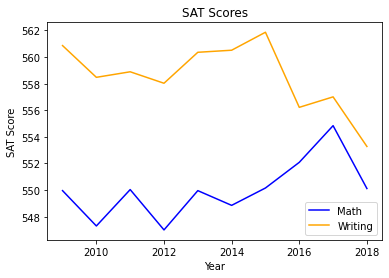

In [0]:
# Line Graph of SAT scores
# SAT scores prior to 2016 have been converted to reflect the new method for scoring

sns.lineplot(x='Year', y='New_Math_Score', data= main, err_style= None, color='blue')
sns.lineplot(x='Year', y='New_Writing_Score', data= main, err_style= None, color= 'orange')
plt.ylabel('SAT Score')
plt.title('SAT Scores')
plt.legend(labels=['Math', 'Writing'], loc='lower right');

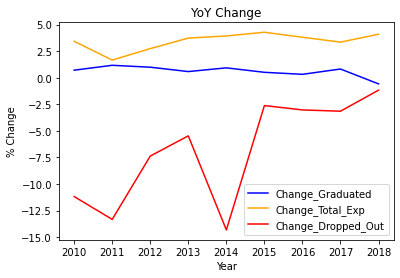

In [0]:
# Line graph of YoY change

sns.lineplot(x='Year', y='Change_Graduated', data= summary, err_style= None, color='blue')
sns.lineplot(x='Year', y='Change_Total_Exp', data= summary, err_style= None, color='orange')
sns.lineplot(x='Year', y='Change_Dropped_Out', data= summary, err_style= None, color='red')
plt.ylabel('% Change')
plt.title('YoY Change')
plt.legend(labels=['Change_Graduated', 'Change_Total_Exp', 'Change_Dropped_Out'], loc='lower right');

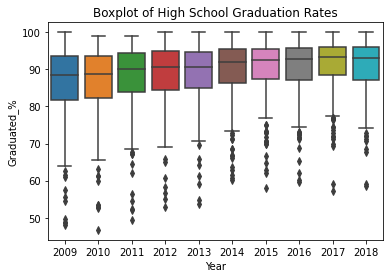

In [0]:
# Boxplot of high school graduation rates

sns.boxplot(x='Year', y= 'Graduated_%', data=main)
plt.title('Boxplot of High School Graduation Rates');

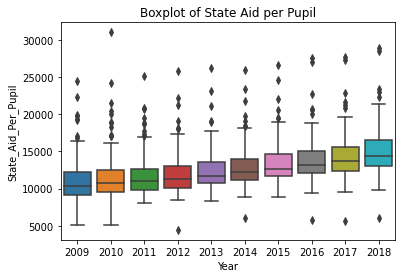

In [0]:
# Boxplot of state aid per-pupil expenditure

sns.boxplot(x='Year', y= 'State_Aid_Per_Pupil', data=main)
plt.title('Boxplot of State Aid per Pupil');

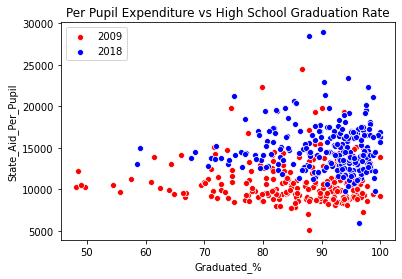

In [0]:
a= main[(main['Year']==2009)]
b= main[(main['Year']==2018)]
sns.scatterplot(x="Graduated_%", y="State_Aid_Per_Pupil", data=a, color= 'red')
sns.scatterplot(x="Graduated_%", y="State_Aid_Per_Pupil", data=b, color= 'blue')
plt.legend(labels=['2009', '2018'], loc='upper left');
plt.title('Per Pupil Expenditure vs High School Graduation Rate');

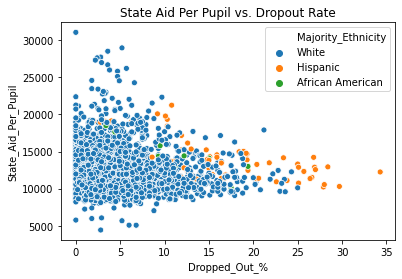

In [0]:
# Scatterplot of per pupil expenditure vs. high school graduaiton rate

sns.scatterplot(x="Dropped_Out_%", y="State_Aid_Per_Pupil", data=main, color= 'red', hue= 'Majority_Ethnicity')
plt.title('State Aid Per Pupil vs. Dropout Rate');

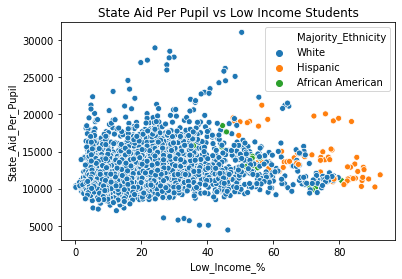

In [0]:
# Scatterplot of per pupil expenditure vs. high school graduaiton rate
sns.scatterplot(x="Low_Income_%", y="State_Aid_Per_Pupil", data=main, color= 'red', hue= 'Majority_Ethnicity')
plt.title('State Aid Per Pupil vs Low Income Students');

**Multivariate Regression Construction**

In [0]:
# Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Dependent Variables (Vectors)
y1 = main['Graduated_%'].values
y2 = main['Dropped_Out_%'].values
y3 = main['New_Math_Score'].values
y4 = main['New_Writing_Score'].values

# Independent Variables (Arrays)
X1 = main[ ['Average_Class_Size', 'Low_Income_%', 'State_Aid_Per_Pupil_(1000s)', 'Teacher_Avg_Salary_(1000s)','Total_Teachers', 'Teacher_Proficient_%', 'Teacher_Needs_Improvement_%'] ]
X2 = main[ ['Average_Class_Size', 'Low_Income_%', 'State_Aid_Per_Pupil_(1000s)', 'Teacher_Avg_Salary_(1000s)','Total_Teachers', 'Teacher_Proficient_%', 'Teacher_Needs_Improvement_%', 'Majority_Ethnicity_African American', 'Majority_Ethnicity_Hispanic'] ]

# X1 does not include school district ethnicity
# X2 includes school district ethnicity

# Training Model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=40)
X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y2, test_size = 0.3, random_state=40)
X1_train, X1_test, y3_train, y3_test = train_test_split(X1, y3, test_size = 0.3, random_state=40)
X1_train, X1_test, y4_train, y4_test = train_test_split(X1, y4, test_size = 0.3, random_state=40)

X2_train, X2_test, y1_train, y1_test = train_test_split(X2, y1, test_size = 0.3, random_state=40)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=40)
X2_train, X2_test, y3_train, y3_test = train_test_split(X2, y3, test_size = 0.3, random_state=40)
X2_train, X2_test, y4_train, y4_test = train_test_split(X2, y4, test_size = 0.3, random_state=40)

# Instantiate Model
linreg1= LinearRegression()
linreg2= LinearRegression()
linreg3= LinearRegression()
linreg4= LinearRegression()

# Linear Regressions 1-4 do not include school district ethnicity

linreg5= LinearRegression()
linreg6= LinearRegression()
linreg7= LinearRegression()
linreg8= LinearRegression()

# Linear Regressions 5-8 includes school district ethnicity

# Fit Model to trainning data
linreg1.fit(X1_train,y1_train)
linreg2.fit(X1_train,y2_train)
linreg3.fit(X1_train,y3_train)
linreg4.fit(X1_train,y4_train)

linreg5.fit(X2_train,y1_train)
linreg6.fit(X2_train,y2_train)
linreg7.fit(X2_train,y3_train)
linreg8.fit(X2_train,y4_train)

# Predictions
y1_pred = linreg1.predict(X1_test)
y2_pred = linreg2.predict(X1_test)
y3_pred = linreg3.predict(X1_test)
y4_pred = linreg4.predict(X1_test)

y5_pred = linreg5.predict(X2_test)
y6_pred = linreg6.predict(X2_test)
y7_pred = linreg7.predict(X2_test)
y8_pred = linreg8.predict(X2_test)


**Constructing Model's Coefficient & Intercept Tables**

In [0]:
coefficient1 = pd.DataFrame(linreg1.coef_, X1.columns, columns=['Coefficient_1'])  
coefficient2 = pd.DataFrame(linreg2.coef_, X1.columns, columns=['Coefficient_2'])  
coefficient3 = pd.DataFrame(linreg3.coef_, X1.columns, columns=['Coefficient_3'])  
coefficient4 = pd.DataFrame(linreg4.coef_, X1.columns, columns=['Coefficient_4'])  

coefficient5 = pd.DataFrame(linreg5.coef_, X2.columns, columns=['Coefficient_5'])  
coefficient6 = pd.DataFrame(linreg6.coef_, X2.columns, columns=['Coefficient_6'])  
coefficient7 = pd.DataFrame(linreg7.coef_, X2.columns, columns=['Coefficient_7'])  
coefficient8 = pd.DataFrame(linreg8.coef_, X2.columns, columns=['Coefficient_8'])  

a= coefficient1.join(coefficient2, how='outer').join(coefficient3, how='outer').join(coefficient4, how='outer')
a= a.rename(columns={'Coefficient_1':'Graduate_%', 'Coefficient_2': 'Dropped_Out_%', 'Coefficient_3':'SAT_Math_Score', 'Coefficient_4':'SAT_Writing_Score'})

b= coefficient5.join(coefficient6, how='outer').join(coefficient7, how='outer').join(coefficient8, how='outer')
b= b.rename(columns={'Coefficient_5':'Graduate_%', 'Coefficient_6': 'Dropped_Out_%', 'Coefficient_7':'SAT_Math_Score', 'Coefficient_8':'SAT_Writing_Score'})

intercept1= [linreg1.intercept_, linreg2.intercept_, linreg3.intercept_,linreg4.intercept_]
intercept2= [linreg5.intercept_, linreg6.intercept_, linreg7.intercept_,linreg8.intercept_]

interceptdf1= pd.DataFrame([intercept1], columns=['Graduate_%', 'Dropped_Out_%','SAT_Math_Score', 'SAT_Writing_Score'], index=['Intercept'])
interceptdf2= pd.DataFrame([intercept2], columns=['Graduate_%', 'Dropped_Out_%','SAT_Math_Score', 'SAT_Writing_Score'], index=['Intercept'])

# Coefficient & Intercept Table for regressions 1-4 (does not include school ethnicity)
tabel1= a.append(interceptdf1)

# Coefficient & Intercept Table for regressions 5-8 (includes school ethnicity)
tabel2= b.append(interceptdf2)

**Coefficient & Intercept Tables**

In [0]:
tabel1 

,Graduate_%,Dropped_Out_%,SAT_Math_Score,SAT_Writing_Score
Average_Class_Size,-0.289117,0.113964,0.943834,0.488178
Low_Income_%,-0.335576,0.175307,-1.618056,-1.909336
State_Aid_Per_Pupil_(1000s),0.225996,-0.168144,0.187253,0.184853
Teacher_Avg_Salary_(1000s),0.126846,-0.074248,0.420952,-0.066734
Total_Teachers,-0.003205,0.001224,0.011936,0.009302
Teacher_Proficient_%,0.038399,-0.020922,-0.090020,-0.249393
Teacher_Needs_Improvement_%,-0.228399,0.127939,-0.962108,-1.122001
Intercept,88.489065,6.984384,547.757474,622.102030


In [0]:
tabel2

,Graduate_%,Dropped_Out_%,SAT_Math_Score,SAT_Writing_Score
Average_Class_Size,-0.271918,0.114015,1.040733,0.631812
Low_Income_%,-0.329311,0.172588,-1.585692,-1.863407
State_Aid_Per_Pupil_(1000s),0.237496,-0.173164,0.246633,0.269098
Teacher_Avg_Salary_(1000s),0.125048,-0.071372,0.413903,-0.075030
Total_Teachers,-0.002600,0.000816,0.014901,0.013390
Teacher_Proficient_%,0.036726,-0.020031,-0.098489,-0.261277
Teacher_Needs_Improvement_%,-0.192291,0.109571,-0.778454,-0.863567
Majority_Ethnicity_African American,-2.236936,-1.128118,-13.803404,-21.298346
Majority_Ethnicity_Hispanic,-2.857705,1.968043,-13.984715,-19.253587
Intercept,87.966229,6.954385,544.781349,617.669262


**Evaluating Multivariate Regressions**

In [0]:
eval1 = {'Value':[linreg1.score(X1_test, y1_test).round(4), np.sqrt(mean_squared_error(y1_test,y1_pred)).round(2), mean_absolute_error(y1_test, y1_pred).round(2)] } 
eval2 = {'Value':[linreg2.score(X1_test, y2_test).round(4), np.sqrt(mean_squared_error(y2_test,y2_pred)).round(2), mean_absolute_error(y2_test, y2_pred).round(2)] } 
eval3 = {'Value':[linreg3.score(X1_test, y3_test).round(4), np.sqrt(mean_squared_error(y3_test,y3_pred)).round(2), mean_absolute_error(y3_test, y3_pred).round(2)] } 
eval4 = {'Value':[linreg4.score(X1_test, y4_test).round(4), np.sqrt(mean_squared_error(y4_test,y4_pred)).round(2), mean_absolute_error(y4_test, y4_pred).round(2)] } 

evaldf1= pd.DataFrame(eval1, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )
evaldf2= pd.DataFrame(eval2, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )
evaldf3= pd.DataFrame(eval3, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )
evaldf4= pd.DataFrame(eval4, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )

result1= pd.concat([evaldf1, evaldf2, evaldf3, evaldf4],axis=1, ignore_index=True)
result1= result1.rename(columns={0:'Graduate_%', 1: 'Dropped_Out_%', 2:'SAT_Math_Score', 3:'SAT_Writing_Score'})

eval5 = {'Value':[linreg5.score(X2_test, y1_test).round(4), np.sqrt(mean_squared_error(y1_test,y5_pred)).round(2), mean_absolute_error(y1_test, y5_pred).round(2)] } 
eval6 = {'Value':[linreg6.score(X2_test, y2_test).round(4), np.sqrt(mean_squared_error(y2_test,y6_pred)).round(2), mean_absolute_error(y2_test, y6_pred).round(2)] } 
eval7 = {'Value':[linreg7.score(X2_test, y3_test).round(4), np.sqrt(mean_squared_error(y3_test,y7_pred)).round(2), mean_absolute_error(y3_test, y7_pred).round(2)] } 
eval8 = {'Value':[linreg8.score(X2_test, y4_test).round(4), np.sqrt(mean_squared_error(y4_test,y8_pred)).round(2), mean_absolute_error(y4_test, y8_pred).round(2)] } 

evaldf5= pd.DataFrame(eval5, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )
evaldf6= pd.DataFrame(eval6, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )
evaldf7= pd.DataFrame(eval7, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )
evaldf8= pd.DataFrame(eval8, index= ['R-Squared', 'Root Mean Squared Error', 'Mean Absolute Error'] )

result2= pd.concat([evaldf5, evaldf6, evaldf7, evaldf8],axis=1, ignore_index=True)
result2= result2.rename(columns={0:'Graduate_%', 1: 'Dropped_Out_%', 2:'SAT_Math_Score', 3:'SAT_Writing_Score'})


**Evaluation Tables**

In [0]:
# Evaluation Table for regression 1-4
result1 

,Graduate_%,Dropped_Out_%,SAT_Math_Score,SAT_Writing_Score
R-Squared,0.6711,0.6345,0.5855,0.6049
Root Mean Squared Error,5.0300,2.8200,26.3300,28.4200
Mean Absolute Error,3.6800,2.0400,20.4900,21.9300


In [0]:
# Evaluation Table for regression 5-8
result2

,Graduate_%,Dropped_Out_%,SAT_Math_Score,SAT_Writing_Score
R-Squared,0.67,0.6336,0.5873,0.6055
Root Mean Squared Error,5.04,2.8200,26.2800,28.4000
Mean Absolute Error,3.68,2.0400,20.4300,21.8800


**Findings**

As expected, both tables show that State Aid Per Pupil and Low Income % have a significant effect on the Graduation and Dropout Rates. Unexpectedly, bad teachers (Teacher_Needs_Improvement_%) had a significant effect on both Graduation and Dropout Rates, with the effect being greater than the effect of good teachers (Teacher_Proficient_%). From these exhibits, we can see that underperforming school districts require more state funding not just to help students who come from economically disadvantaged backgrounds, but also to recruit better teachers. 

The ethnicity of a school district plays a significant role in determining SAT Scores. School districts that are predominantly African American or Hispanic have lower SAT Math and Writing scores compared to a predominantly White school district, assuming all other variables are held constant. State Aid Per Pupil and Teacher Performance harm scores, regardless of a school district’s ethnicity. Similar to Graduation and Dropout Rates, the percent of low-income students within a school district harms SAT scores. 


The analysis that we have conducted on school districts shows that State Aid Per Pupil, percentage of students from economically disadvantaged backgrounds, bad teachers, and the ethnicity of a school district play a significant role in determining a district's Graduation and Dropout Rates. These factors, in turn, negatively affect Massachusetts' average Graduation and Dropout Rates, which explains why it has been lagging. Although the state has steadily increased school funding over the ten years, it is evident from the graphs that this funding has not improved the performance of school districts that are predominantly African American or Hispanic. Furthermore, as public school district aid is not progressive, school districts that are Hispanic or African American, and home to many economically disadvantaged students, are being adversely affected. Graduation Rates drop 2.2% and 2.9% in African American and Hispanic school districts, and Dropout Rates increase 1.1 and 2% in those same districts, all else being equal. 

When we analyzed SAT scores for public school districts and factored in ethnicity, we see the same trends. Although Asian and White students have higher scores than African American and Hispanic students, students from all four ethnicities suffer in performance if they are based out of a school district that is predominantly either African American or Hispanic. The effect of a school's ethnic makeup has the most significant effect in our multivariate analysis. SAT Math scores drop by 14 points in African American and Hispanic school districts and SAT Writing scores drop by 21 and 19 points in those same districts, all else being equal. 


**Export Master Tables**

In [0]:
# Export Table

# 10 Year Summary Table
summary.to_excel('summary_table.xlsx')

# District Level Data
district_level_data= main[main['Year']>=2009]
district_level_data.to_excel("Main_Table.xlsx", sheet_name='Sheet1')

# Graduate by Ethnicity
graduate_by_ethnicity= df11[df11['Year']>=2009]
graduate_by_ethnicity.to_excel("Graduate_By_Ethnicity.xlsx", sheet_name='Graduate_Ethnicity')

# Dropout by Ethnicity
dropout_by_ethnicity= df12[df12['Year']>=2009]
dropout_by_ethnicity.to_excel("Dropout_By_Ethnicity.xlsx", sheet_name='Dropout_Ethnicity')

# SAT Scores by Ethnicity
sat_by_ethnicity= df14[df14['Year']>=2009]
sat_by_ethnicity.to_excel("SAT_By_Ethnicity.xlsx", sheet_name='SAT_Ethnicity')


